In [20]:
import cv2
import numpy as np

# Specify full paths to the files
weights_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.weights"
config_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.cfg.txt"
names_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/coco.names.txt"
# Load YOLO model
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)
# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

print("✅ YOLOv3 model loaded successfully!")

✅ YOLOv3 model loaded successfully!


In [15]:
# import cv2
import numpy as np
import os

# Paths to YOLO model files
weights_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.weights"
config_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.cfg.txt"
names_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/coco.names.txt"
# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

# Define thresholds
conf_threshold = 0.5
nms_threshold = 0.4

# Define input and output directories
input_folder ="C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/testing_images"# Folder containing images
output_folder = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test" # Folder to save detected images

# Create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get list of all image files
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# Process each image in the dataset
for image_name in image_files:
    image_path = os.path.join(input_folder, image_name)
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Convert image into blob format
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer names
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Run forward pass and get detections
    detections = net.forward(output_layers)

    # Process detections
    boxes, confidences, class_ids = [], [], []

    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold:
                center_x, center_y, w, h = (detection[0:4] * [width, height, width, height]).astype("int")
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Fix: Handle cases where indices are a single integer
    if isinstance(indices, np.ndarray) or isinstance(indices, list):
        indices = indices.flatten()  # Convert to a flat list if it's an array

    # Draw bounding boxes on image
    if len(indices) > 0:
        for i in indices:
            x, y, w, h = boxes[i]
            label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
            color = (0, 255, 0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save the output image with detections
    output_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_path, image)
    print(f"Processed {image_name} -> Saved to {output_path}")

print("✅ All images processed successfully!")

Processed vid_5_25100.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25100.jpg
Processed vid_5_25120.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25120.jpg
Processed vid_5_25140.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25140.jpg
Processed vid_5_25160.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25160.jpg
Processed vid_5_25180.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25180.jpg
Processed vid_5_25200.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25200.jpg
Processed vid_5_25220.jpg -> Saved to C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test\vid_5_25220.jpg
Processed vid_5_2524

In [21]:
import os

print("Weights exist:", os.path.exists(weights_path))
print("Config exists:", os.path.exists(config_path))
print("Names exist:", os.path.exists(names_path))


Weights exist: True
Config exists: True
Names exist: True


In [31]:
import cv2
import numpy as np
import os

# Paths to YOLO model files
weights_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.weights"
config_path =  "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/yolov3.cfg"
names_path = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/coco.names.txt"

# Load YOLO model
net = cv2.dnn.readNet(weights_path, config_path)

# Load class labels
with open(names_path, "r") as f:
    classes = f.read().strip().split("\n")

# Define thresholds
conf_threshold = 0.5
nms_threshold = 0.4

# Define input and output directories
input_folder = "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/training_images"# Folder containing images
output_folder =  "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train" # Folder to save detected images

# Create output folder if it does not exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get list of all image files
image_files = [f for f in os.listdir(input_folder) if f.endswith((".jpg", ".png", ".jpeg"))]

# Process each image in the dataset
for image_name in image_files:
    image_path = os.path.join(input_folder, image_name)
    image = cv2.imread(image_path)
    height, width = image.shape[:2]

    # Convert image into blob format
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layer names
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

    # Run forward pass and get detections
    detections = net.forward(output_layers)

    # Process detections
    boxes, confidences, class_ids = [], [], []

    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > conf_threshold:
                center_x, center_y, w, h = (detection[0:4] * [width, height, width, height]).astype("int")
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression (NMS)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

    # Fix: Handle cases where indices are a single integer
    if isinstance(indices, np.ndarray) or isinstance(indices, list):
        indices = indices.flatten()  # Convert to a flat list if it's an array

    # Draw bounding boxes on image
    if len(indices) > 0:
        for i in indices:
            x, y, w, h = boxes[i]
            label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
            color = (0, 255, 0)
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Save the output image with detections
    output_path = os.path.join(output_folder, image_name)
    cv2.imwrite(output_path, image)
    print(f"Processed {image_name} ->fhf Saved to {output_path}")

print("✅ All images processed successfully!")

Processed vid_4_1000.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_1000.jpg
Processed vid_4_10000.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10000.jpg
Processed vid_4_10020.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10020.jpg
Processed vid_4_10040.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10040.jpg
Processed vid_4_10060.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10060.jpg
Processed vid_4_10080.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10080.jpg
Processed vid_4_10100.jpg ->fhf Saved to C:/sers/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_train\vid_4_10100.jpg
P

Trying to load: C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test/vid_5_26800.jpg


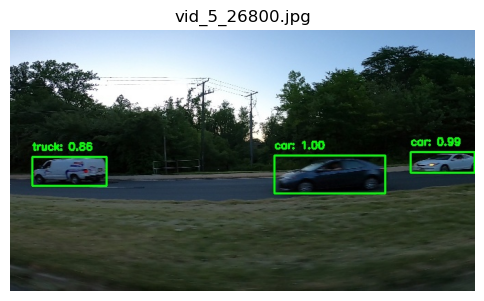

Trying to load: C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test/vid_5_27360.jpg


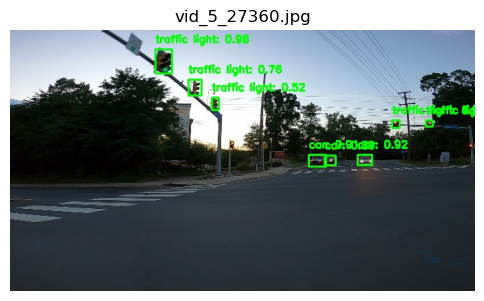

In [13]:
import cv2
import matplotlib.pyplot as plt

# 🔁 Replace these with your actual image paths
image_paths = [
    "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test/vid_5_26800.jpg",  # <-- your first image path
  "C:/Users/pkrva/OneDrive/Pictures/Screenshots/Desktop/archive (1)/data/new_output_test/vid_5_27360.jpg"]

# Display each image
for path in image_paths:
    print(f"Trying to load: {path}")
    image = cv2.imread(path)
    
    if image is None:
        print(f"❌ Failed to load image: {path}")
        continue
    
    # Convert BGR (OpenCV format) to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the image
    plt.figure(figsize=(6, 4))
    plt.imshow(image)
    plt.title(path.split("/")[-1])  # Show just the filename as title
    plt.axis("off")
    plt.show()


🔍 Performance Metrics:
✅ Accuracy : 0.75
✅ Precision: 0.78
✅ Recall   : 0.75
✅ F1 Score : 0.74

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      0.67      0.67         3
           2       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.81      0.72      0.73         8
weighted avg       0.78      0.75      0.74         8



C:\Users\pkrva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


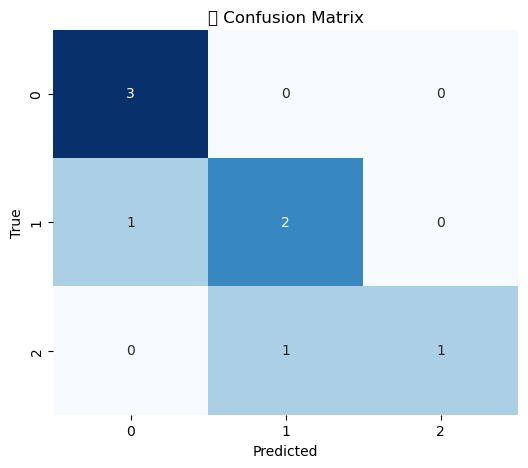

In [1]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Replace these with your actual values
y_true = [0, 1, 1, 0, 1, 2, 2, 0]    # True labels
y_pred = [0, 1, 0, 0, 1, 2, 1, 0]    # Predicted labels

# 📊 Basic Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# 📃 Detailed Report
report = classification_report(y_true, y_pred, zero_division=0)

# 🔥 Display Metrics
print("🔍 Performance Metrics:")
print(f"✅ Accuracy : {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall   : {recall:.2f}")
print(f"✅ F1 Score : {f1:.2f}")
print("\n📄 Classification Report:\n")
print(report)

# 🔥 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("🧊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


🔍 Performance Metrics:
✅ Accuracy : 0.75
✅ Precision: 0.78
✅ Recall   : 0.75
✅ F1 Score : 0.74

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       0.67      0.67      0.67         3
           2       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.81      0.72      0.73         8
weighted avg       0.78      0.75      0.74         8



C:\Users\pkrva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129482 (\N{ICE CUBE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


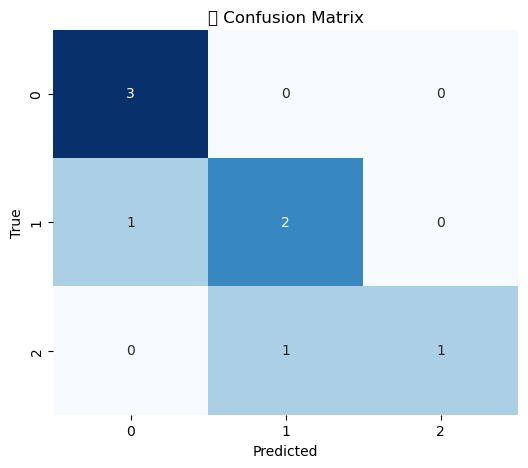

In [1]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# 🔁 Replace these with your actual values
y_true = [0, 1, 1, 0, 1, 2, 2, 0]    # True labels
y_pred = [0, 1, 0, 0, 1, 2, 1, 0]    # Predicted labels

# 📊 Basic Metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

# 📃 Detailed Report
report = classification_report(y_true, y_pred, zero_division=0)

# 🔥 Display Metrics
print("🔍 Performance Metrics:")
print(f"✅ Accuracy : {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall   : {recall:.2f}")
print(f"✅ F1 Score : {f1:.2f}")
print("\n📄 Classification Report:\n")
print(report)

# 🔥 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("🧊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


Thresholds:
 [0.1  0.2  0.3  0.4  0.76 0.8  0.85 0.88 0.9  0.95]
Precision:
 [0.6        0.66666667 0.75       0.85714286 1.         1.
 1.         1.         1.         1.        ]
Recall:
 [1.         1.         1.         1.         1.         0.83333333
 0.66666667 0.5        0.33333333 0.16666667]

Average Precision (AP or mAP@50): 1.0000


C:\Users\pkrva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


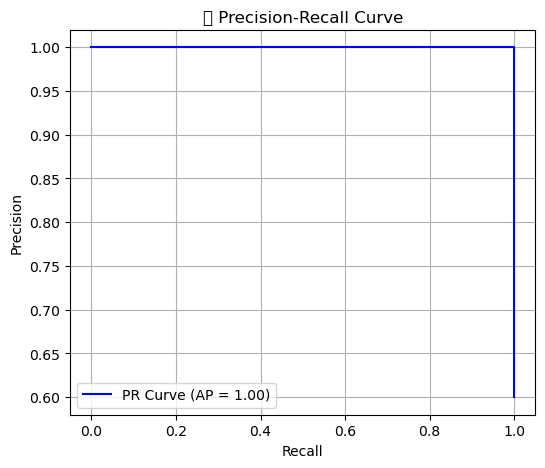

C:\Users\pkrva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129001 (\N{LARGE GREEN SQUARE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


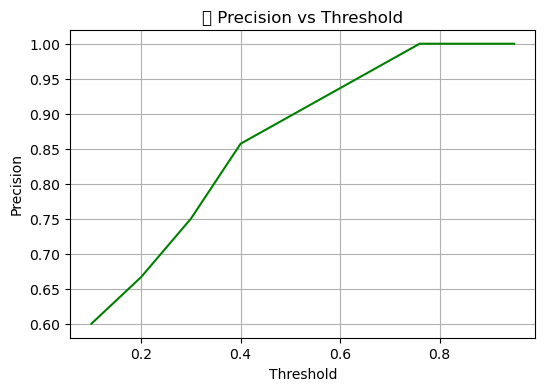

C:\Users\pkrva\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128999 (\N{LARGE ORANGE SQUARE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


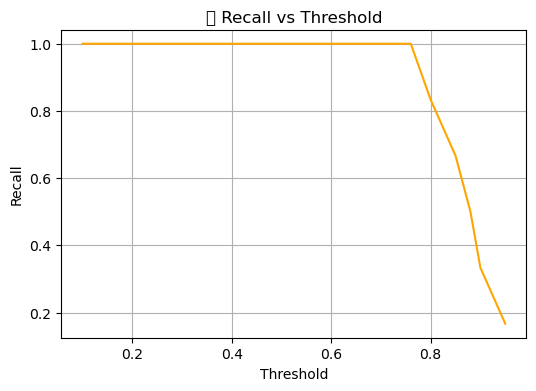

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# 🔁 Replace these with your actual labels and predicted probabilities
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]  # True labels (0 or 1)
y_scores = [0.1, 0.9, 0.8, 0.3, 0.85, 0.95, 0.2, 0.4, 0.88, 0.76]  # Predicted probabilities for class 1

# 🔍 Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
average_precision = average_precision_score(y_true, y_scores)

# 🖨️ Print precision, recall, thresholds
print("Thresholds:\n", thresholds)
print("Precision:\n", precision[:-1])  # last value in precision doesn't have a corresponding threshold
print("Recall:\n", recall[:-1])
print(f"\nAverage Precision (AP or mAP@50): {average_precision:.4f}")

# 📈 PR Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f'PR Curve (AP = {average_precision:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📈 Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# 📈 Precision Curve
plt.figure(figsize=(6, 4))
plt.plot(thresholds, precision[:-1], color='green')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('🟩 Precision vs Threshold')
plt.grid(True)
plt.show()

# 📈 Recall Curve
plt.figure(figsize=(6, 4))
plt.plot(thresholds, recall[:-1], color='orange')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('🟧 Recall vs Threshold')
plt.grid(True)
plt.show()
